# Пример с распознаванием цифр

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем данные

In [2]:
digits = datasets.load_digits()

Пример первой цифры

In [3]:
digits['data'][0].reshape(8, 8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [4]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [5]:
import matplotlib.pyplot as plt

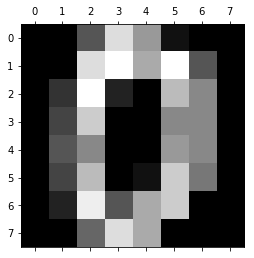

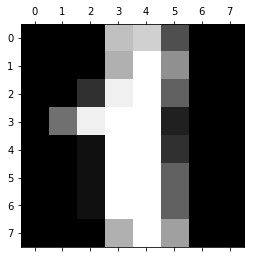

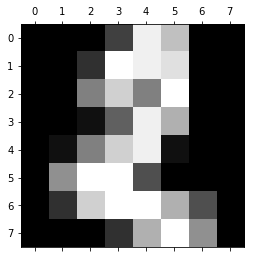

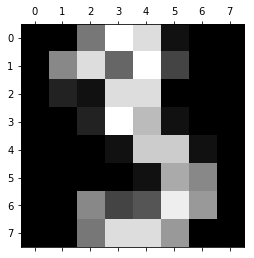

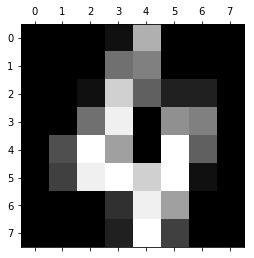

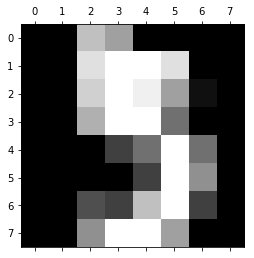

In [6]:
plt.gray()
for i in range(0, 6):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [7]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [8]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [9]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [10]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

Формируем тестовую выборку и обучаем модель knn

In [11]:
#Формируем тестовую выборку
X_test = X_digits[split:]
Y_test = Y_digits[split:]

In [12]:
#Обучаем модель на выборке для обучения
knn = KNeighborsClassifier().fit( X_train, Y_train )

In [13]:
#Формируем процедуру, которая по массиву определяет какое в нем зашивровано число
def digit_value (k):
    for i in range(len(k)):
        if round(k[i]) == 1:
            return i
    #если определить не удалось, выводим ошибку
    return 999

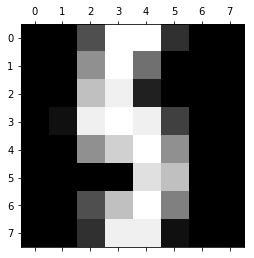

Предсказанное число: 5


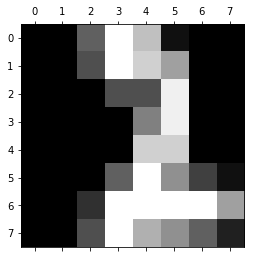

Предсказанное число: 2


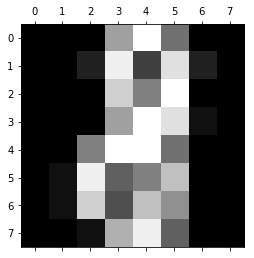

Предсказанное число: 8


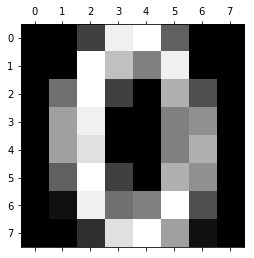

Предсказанное число: 0


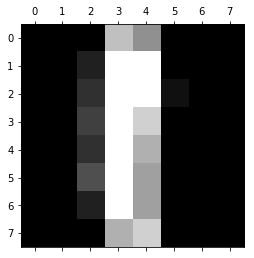

Предсказанное число: 1


In [14]:
#Для примера выведем пять значений из тестовой выборки и предсказанные для них значения
for i in range (split, split+5, 1):
    plt.matshow(digits.images[i])
    plt.show() 
    k = i - split
    print('Предсказанное число:', digit_value(knn.predict_proba( X_test )[k]))

In [15]:
#Посмотрим точность предсказаний на тестовой выборке
knn.score( X_test, Y_test )

0.96111111111111114